In [24]:
using FileIO
using PyPlot
using LaTeXStrings
using MixedLayerModel

In [25]:
out400 = load("../experiments/output/co2_400.jld2")

out500 = load("../experiments/output/co2_upstep_500.jld2")
out600 = load("../experiments/output/co2_upstep_600.jld2")
out700 = load("../experiments/output/co2_upstep_700.jld2")
out800 = load("../experiments/output/co2_upstep_800.jld2")

p = basic_params();

In [26]:
function profile(u, maxz)
    zi, hM, qM, SST = u;
    
    stepz = 1.0;
    z1 = collect(0:stepz:zi); z2 = collect(zi:stepz:maxz);
    z = [z1;z2];
    
    h = [hM .* ones(length(z1)); h_ft(z2, p)];
    qt = [qM .* ones(length(z1)); q_ft(z2, p)];
    
    θ = theta(z,h,qt); # K
    
    T = temp.(z,h,qt);
    ql = q_l(z,T,qt) * 1000.0; # kg/kg -> g/kg
    
    return z, θ, ql 
end

profile (generic function with 2 methods)

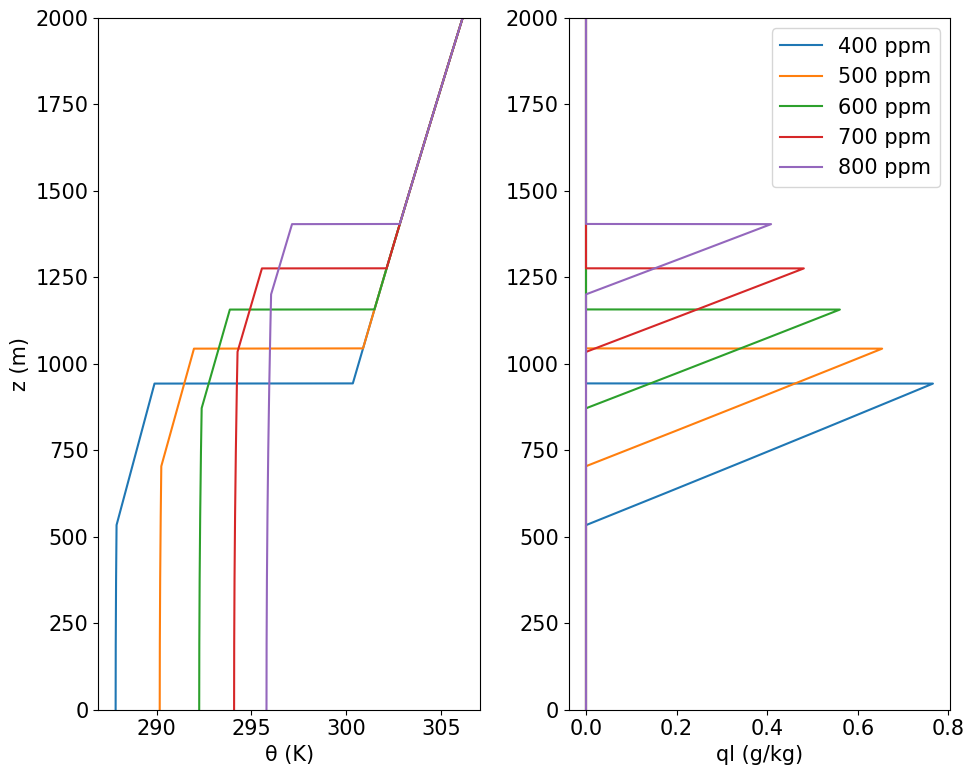

In [32]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig1 = figure(figsize=(10,8));
ax1 = subplot(121);
ax2 = subplot(122);

exps = [out400, out500, out600, out700, out800];
co2 = [400, 500, 600, 700, 800];
maxz = 2000;

for (i,o) in enumerate(exps)
    u = o["uf"];
    z, θ, ql = profile(u, maxz)
    ax1.plot(θ, z)
    ax2.plot(ql, z, label=string(co2[i])*" ppm")
end

ax1.set_ylim([0,maxz]); ax2.set_ylim([0,maxz]);
ax1.set_ylabel("z (m)");
ax1.set_xlabel("θ (K)"); ax2.set_xlabel("ql (g/kg)");
legend();
tight_layout();
show()

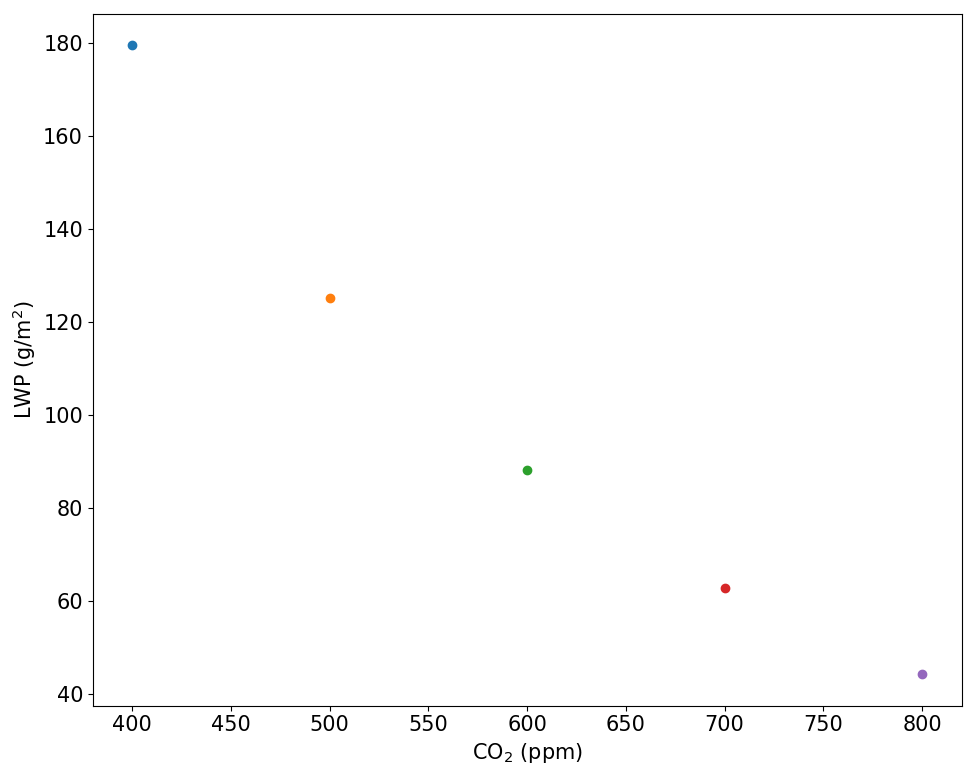

In [33]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig1 = figure(figsize=(10,8));

exps = [out400, out500, out600, out700, out800];
co2 = [400, 500, 600, 700, 800];

for (i,o) in enumerate(exps)
    u = o["uf"];
    co2i = co2[i];
    zi, hM, qM, SST = u;
    lwp = calc_LWP(zi, hM, qM) * 1000;
    plot(co2i, lwp, "o")
end

xlabel(L"CO$_2$ (ppm)"); ylabel(L"LWP (g/m$^2$)");
tight_layout();
show()